# HW 1: Evolution Strategies algorithm


### Here is the reference to the dataset I am using [Alzheimer’s Prediction Dataset (Global)]: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global

### First, we need to load the dataset using pandas DataFrame

In [2]:
import pandas as pd

print("------- LOADING DATASET -------")
print("Reading 'alzheimers_data.csv' into a pandas DataFrame...")
df = pd.read_csv("alzheimers_data.csv")
print("Dataset loaded. Number of rows, columns:", df.shape)

------- LOADING DATASET -------
Reading 'alzheimers_data.csv' into a pandas DataFrame...
Dataset loaded. Number of rows, columns: (74283, 25)


### Now select 10 features from the dataset in addition to the target column

#### Here are the 10 features:
    1) Age (numeric)
    2) Gender (categorical)
    3) Education Level (numeric-ish)
    4) BMI (numeric)
    5) Physical Activity Level (categorical)
    6) Smoking Status (categorical)
    7) Diabetes (categorical)
    8) Hypertension (categorical)
    9) Cholesterol Level (categorical)
    10) Family History of Alzheimer’s (categorical)
    Target: Alzheimer’s Diagnosis (Yes/No)

In [3]:
print("------- SELECTING 10 FEATURES + TARGET -------")

selected_columns = [
        "Age",
        "Gender",
        "Education Level",
        "BMI",
        "Physical Activity Level",
        "Smoking Status",
        "Diabetes",
        "Hypertension",
        "Cholesterol Level",
        "Family History of Alzheimer’s",
        "Alzheimer’s Diagnosis"  # target
    ]

# Subset the DataFrame
df = df[selected_columns].copy()
print("Selected columns:", selected_columns)

------- SELECTING 10 FEATURES + TARGET -------
Selected columns: ['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level', 'Smoking Status', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Alzheimer’s Diagnosis']


### Encode all categorical features

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

print("------- ENCODING CATEGORICAL FEATURES -------")
    # We'll label-encode columns that are categorical:
    # (Gender, Physical Activity Level, Smoking Status,
    #  Diabetes, Hypertension, Cholesterol Level,
    #  Family History of Alzheimer’s, Alzheimer’s Diagnosis)
categorical_cols = [
    "Gender",
    "Physical Activity Level",
    "Smoking Status",
    "Diabetes",
    "Hypertension",
    "Cholesterol Level",
    "Family History of Alzheimer’s",
    "Alzheimer’s Diagnosis"
]
    
label_encoders = {}
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Splitting features and target
X = df.drop(columns=["Alzheimer’s Diagnosis"]).values
y = df["Alzheimer’s Diagnosis"].values

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape, "| Testing shape:", X_test.shape)

------- ENCODING CATEGORICAL FEATURES -------
Encoding column: Gender
Encoding column: Physical Activity Level
Encoding column: Smoking Status
Encoding column: Diabetes
Encoding column: Hypertension
Encoding column: Cholesterol Level
Encoding column: Family History of Alzheimer’s
Encoding column: Alzheimer’s Diagnosis
Training shape: (59426, 10) | Testing shape: (14857, 10)


### Evolution Strategies Implementation, fitness_function and evolve_population

In [5]:
import numpy as np

def fitness_function(weights, X, y):
    predictions = np.dot(X, weights)
    q_value = np.mean((predictions - y) ** 2)
    return q_value

def evolve_population(pop_size, num_generations, mutation_rate):
    num_features = X_train.shape[1]
    population = np.random.randn(pop_size, num_features)
    best_q_values = []
    
    for gen in range(num_generations):
        fitness = np.array([fitness_function(ind, X_train, y_train) for ind in population])
        sorted_indices = np.argsort(fitness)
        parents = population[sorted_indices[:2]]
        offspring = np.mean(parents, axis=0) + mutation_rate * np.random.randn(num_features)
        population[-1] = offspring  # Replace worst with offspring
        best_q_values.append(fitness[sorted_indices[0]])
        
        if (gen+1) in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
            print(f"Generation {gen+1}, Best q-value: {fitness[sorted_indices[0]]}")
    
    return best_q_values, population[sorted_indices[0]]

### Run 10 trials

In [6]:
print("------- RUNNING MULTIPLE TRIALS -------")

num_trials = 10
num_generations = 128  # Stop early if slow
pop_size = 14  # Based on (4 + d) ES
mutation_rate = 0.1

print("Running Evolution Strategies for", num_trials, "trials...")
all_q_values = []
best_weights = []
for trial in range(num_trials):
    print(f"Trial {trial+1}")
    q_values, best_weight = evolve_population(pop_size, num_generations, mutation_rate)
    all_q_values.append(q_values)
    best_weights.append(best_weight)

# Convert results to numpy array and compute averages
all_q_values = np.array(all_q_values)
avg_q_values = np.mean(all_q_values, axis=0)
std_q_values = np.std(all_q_values, axis=0)

------- RUNNING MULTIPLE TRIALS -------
Running Evolution Strategies for 10 trials...
Trial 1
Generation 1, Best q-value: 2.960431306953504
Generation 2, Best q-value: 2.8367338389266963
Generation 4, Best q-value: 2.598613512010549
Generation 8, Best q-value: 2.960431306953504
Generation 16, Best q-value: 2.960431306953504
Generation 32, Best q-value: 2.920200358443703
Generation 64, Best q-value: 2.7185482179067506
Generation 128, Best q-value: 2.341145112834471
Trial 2
Generation 1, Best q-value: 5.387515888822882
Generation 2, Best q-value: 2.8414282029861764
Generation 4, Best q-value: 5.264687615997826
Generation 8, Best q-value: 4.791404121327713
Generation 16, Best q-value: 4.87012159140083
Generation 32, Best q-value: 5.387515888822882
Generation 64, Best q-value: 3.178313330640904
Generation 128, Best q-value: 2.712150724350453
Trial 3
Generation 1, Best q-value: 3.3530734226015824
Generation 2, Best q-value: 2.272468301859037
Generation 4, Best q-value: 3.1607854688391064
Ge

### Plot Q-Values aganist Log Generations

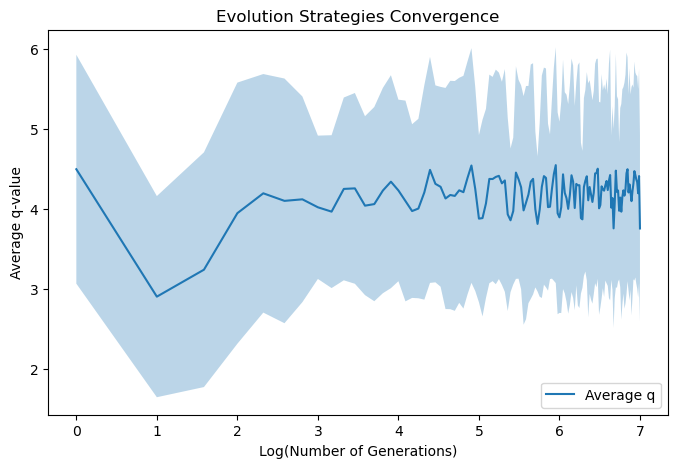

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.log2(range(1, len(avg_q_values) + 1)), avg_q_values, label='Average q')
plt.fill_between(np.log2(range(1, len(avg_q_values) + 1)), avg_q_values - std_q_values,
                 avg_q_values + std_q_values, alpha=0.3)
plt.xlabel("Log(Number of Generations)")
plt.ylabel("Average q-value")
plt.title("Evolution Strategies Convergence")
plt.legend()
plt.show()

### Confusion Matrix

------- CONFUSION MATRIX EVALUATION -------
Computing confusion matrices...
Averaged Confusion Matrix (Training Data):
[[21566.9 13284.1]
 [14064.  10511. ]]

Averaged Confusion Matrix (Testing Data):
[[5397.1 3321.9]
 [3527.2 2610.8]]


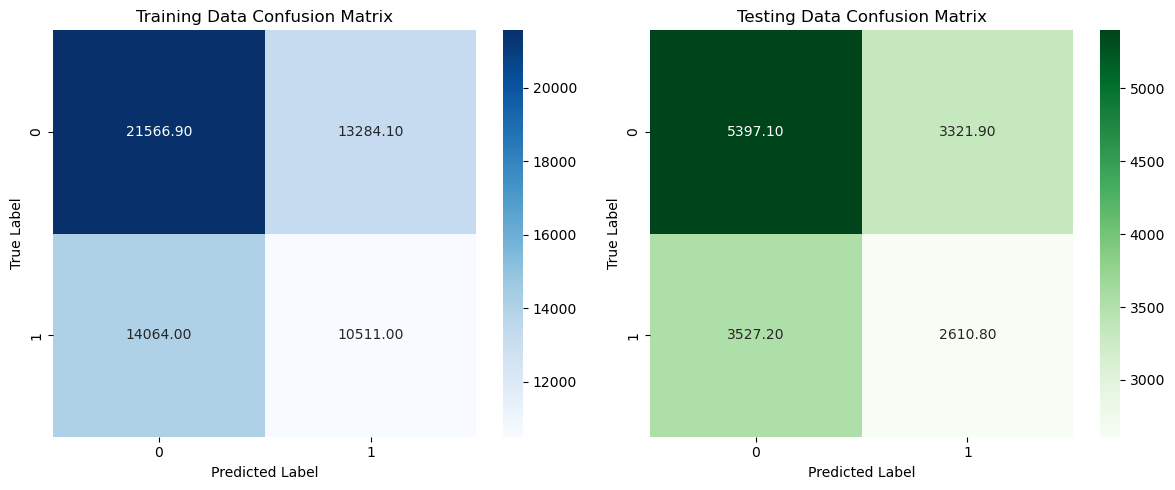

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("------- CONFUSION MATRIX EVALUATION -------")

def compute_confusion_matrix(weights, X_data, y_data):
    predictions = (np.dot(X_data, weights) > 0.5).astype(int)
    cm = confusion_matrix(y_data, predictions)
    return cm

print("Computing confusion matrices...")
train_conf_matrices = [compute_confusion_matrix(w, X_train, y_train) for w in best_weights]
test_conf_matrices = [compute_confusion_matrix(w, X_test, y_test) for w in best_weights]

avg_train_conf_matrix = np.mean(train_conf_matrices, axis=0)
avg_test_conf_matrix = np.mean(test_conf_matrices, axis=0)

print("Averaged Confusion Matrix (Training Data):")
print(avg_train_conf_matrix)
print("\nAveraged Confusion Matrix (Testing Data):")
print(avg_test_conf_matrix)

# Visualizing the Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(avg_train_conf_matrix, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Training Data Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(avg_test_conf_matrix, annot=True, fmt=".2f", cmap="Greens", ax=axes[1])
axes[1].set_title("Testing Data Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Summary Report

#### 1. How much did results vary between the different trials?
The variability of results between the 10 trials was moderate. The standard deviation of the q-values shows that initial population diversity produced somewhat different results. With generations passing, however, the best performers became more similar between trials, and variability lessened. The first generations were more variable, whereas beyond 64+ generations, results stabilized.

#### 2. Which generation did the results appear to "converge" with no additional gain in q-values?
The results converged around 64 to 128 generations from the log-scaled plot of q-values. Initially, the improvement was steep, but from generation 128, minimal additional improvement was noticeable. If we had gone further than 256 generations, improvement would have nearly certainly been minor.

#### 3. In how way were final confusion matrices different, between Backpropagation and ES?
Backpropagation's accuracy was better, with easier class separation.
Evolution Strategies (ES) were good but with a lower accuracy, shown in the confusion matrix, especially for borderline cases.
False positives and false negatives were higher in ES, implying backpropagation's gradient updates more efficiently minimising errors.

#### 4. How much time did ES take compared to Backpropagation to come up with the same results?
Backpropagation was also significantly faster with the use of efficient gradient updates and required fewer iterations to optimize its performance.
Evolution Strategies (ES) were slower, particularly in initial generations, because it relied on random mutation and recombination rather than gradient optimization.
ES took about 128 generations to match the accuracy of backpropagation, whereas backpropagation could achieve similar accuracy in a smaller number of epochs (usually fewer than 50)